Bivariate analysis - Numerical vs Numerical column

Regression - Regression attempts to predict one dependent variable (usually denoted by Y) and a series of other changing variables (known as independent variables, usually denoted by X).

Linear Regression - Linear Regression is a way of predicting a response Y on the basis of a single predictor variable X. It is assumed that there is approximately a linear relationship between X and Y.


In [1]:

# Lets import libraries

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import sklearn
from sklearn.linear_model import LinearRegression

In [2]:
# Using the cars data set

import os
import pandas as pd

path =r"D:\eda xam\Batch 6 - EDA\Cars"

car = pd.read_excel('Cars.xlsx')

car.head()

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),16,26,p,compact


Creating a simple linear regression to predict the highway milage given a city milage. We normally do not create the model on whole data. We will learn how to create a more accurate data model in later stage.

Right now we are creating the model on whole data

In [5]:
# Creating a linear regression object

lm = LinearRegression()

# Taking only the city milage (X) column and highway milage (Y) column

X = car[['cty']]
Y = car[['hwy']]

# Fitting the model

model1 = lm.fit(X, Y) 

# Printing the intercept value and coefficients value
print ('Estimated intercept:', lm.intercept_)
print ('coefficients:', lm.coef_)

Estimated intercept: [0.8920411]
coefficients: [[1.33745561]]


In [4]:
# Thus the linear equation will be Y = 1.33745561 * X + 0.8920411

# Lets predict the highway milage if the city milage is 26

# Creating a np array 

val_data = pd.DataFrame.from_dict({'cty' : [26]})

# Predicting the highway milage

Pred_highway_milage = model1.predict(val_data)

Pred_highway_milage

array([[35.66588697]])

Actual model - 4 step process - 1) Split the data into training and testing, 2) train the model on training data, 3) test the model on testing data and 4) predicat the model on the validation data.

In [6]:
# Lets split the data into training and test in the ratio of 80 : 20

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

len(X_train), len(X_test), len(Y_train), len(Y_test)

(187, 47, 187, 47)

In [7]:
#  Build a linear regression model using my training data sets.

lm2 = LinearRegression()

model2 = lm2.fit(X_train, Y_train)
# Testing the model on test data and storing it in a new column

Y_test['hwy_Pred'] = model2.predict(X_test)

round(Y_test,2).head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,hwy,hwy_Pred
85,16,18.40
155,26,22.35
97,22,21.03
175,19,21.03
200,20,21.03


In [9]:
# Lets predict the highway milage for a city milage of 26


# Creating the validation data:

val_data1 = pd.DataFrame.from_dict({'cty' : [26]})

# Predicting the highway milage

Pred_highway_milage1 = model2.predict(val_data1)

Pred_highway_milage1

array([[35.51212239]])

Exercise - linear regression: The number of visitors to a cycle track and the number of drinks sold by a café at the location are recorded in the dataset - Drinks. Using the data set find the answer for: 

a) Which particular day does not fit the relationship? 
b) If one day there were 50 visitors, estimate how many drinks would be sold.

Univariate analysis - Working with dates column

In [41]:
# Importing the data

from datetime import date

df = pd.read_excel("Data and time.xlsx")

# lets check the date column

# We can covert any object as datetime object by

df['Date'] = pd.to_datetime(df['Transaction.Date'])

df.dtypes


Transaction.Date            object
Date                datetime64[ns]
dtype: object

In [42]:
# Lets get few derive columns from date:

# 1) Column of month

df['Month'] = df['Date'].dt.month

# Incase you want Full name of month

df['Month'] = df['Date'].dt.month_name()

# Incase you want abbrivate form of month

df['Month'] = df['Date'].dt.month_name().str.slice(stop = 3)

#df.head()

In [43]:
# 2) Column of Day

df['Day'] = df['Date'].dt.day

# Incase you want to extract the weekday name 

df['Day'] = df['Date'].dt.day_name()

# Abbrivate form of day

df['Day'] = df['Date'].dt.day_name().str.slice(stop = 3)

#df.head(2)

In [44]:
# 3) Column of Year

df['Year'] = df['Date'].dt.year

#df.head(2)

In [45]:
# 4) Column of Quarters

df['Quarters'] = df['Date'].dt.quarter

In [46]:
# You can also use strftime fuction to get the required output

df["Month2"] = df['Date'].dt.strftime("%m")

#df.head(2)

In [49]:
# Lets get few derive columns from time: 

# 1) Column of time

df['Time'] = df['Date'].dt.time

#df.head(2)

In [51]:
# 2) Column of only hour

df['Hour'] = df['Date'].dt.hour

#df.head(2)

In [54]:
# 3) Column of min and second

df['Minute'] = df['Date'].dt.minute

df['Second'] = df['Date'].dt.second

# df.head(2)

Exercise - Date and time: 

Using the file narendramodi_tweets find the following: 

1) Month wise tweets
2) Hours wise tweets
3) Source wise - week day wise tweets

Univariate analysis - Text column

What can we do in EDA - 

1) We can identify the lenght of each text
2) We can use bag of words concept to identify the top words

In [3]:
# Importing the libraries which we will use

import numpy as np
import pandas as pd
import string
import nltk
#nltk.download('stopwords')
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from matplotlib import pyplot as plt

In [58]:
# Importing the data

df = pd.read_excel('narendramodi_tweets.xlsx')

#df.head(2)

In [59]:
# Subset the column of review.text

text = df[['text']]

print(text["text"][0])

The President's address wonderfully encapsulated India's strengths, aspirations, potential &amp; the efforts towards #TransformingIndia.


In [60]:
# A very basic features we can extract is the number of words in each review.

text["Count"] = text['text'].apply(lambda x : len(str(x).split(" ")))

text.head()

E:\Anacondajupyter\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,text,Count
0,The President's address wonderfully encapsulat...,14
1,Rashtrapati Ji's address to both Houses of Par...,16
2,RT @PMOIndia: Empowering the marginalised. htt...,6
3,RT @PMOIndia: Commitment to welfare of farmers...,8
4,RT @PMOIndia: Improving the quality of life fo...,11


In [61]:
# Cleaning the data - removing punctuation, numbers, converting everything to lower case etc

text['Clean_text'] = text['text'].str.lower().str.replace('[^a-z ]', '')

print(text["Clean_text"][0])

the presidents address wonderfully encapsulated indias strengths aspirations potential amp the efforts towards transformingindia


E:\Anacondajupyter\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [62]:
# Removing the stop words

stop = set(stopwords.words('english'))

# If you want to extend the stopword list

# stop.extend(['use', 'im'])

def sw(text):
    text = [word for word in text.split() if word not in stop]
    # joining the list of words with space separator
    return " ".join(text)

text['Split_words'] = text['Clean_text'].apply(sw)

text.head()

E:\Anacondajupyter\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,text,Count,Clean_text,Split_words
0,The President's address wonderfully encapsulat...,14,the presidents address wonderfully encapsulate...,presidents address wonderfully encapsulated in...
1,Rashtrapati Ji's address to both Houses of Par...,16,rashtrapati jis address to both houses of parl...,rashtrapati jis address houses parliament inde...
2,RT @PMOIndia: Empowering the marginalised. htt...,6,rt pmoindia empowering the marginalised httpst...,rt pmoindia empowering marginalised httpstcoww...
3,RT @PMOIndia: Commitment to welfare of farmers...,8,rt pmoindia commitment to welfare of farmers h...,rt pmoindia commitment welfare farmers httpstc...
4,RT @PMOIndia: Improving the quality of life fo...,11,rt pmoindia improving the quality of life for ...,rt pmoindia improving quality life poor httpst...


In [63]:
# create a count vectorizer object
count_vectorizer = CountVectorizer()
# fit the count vectorizer using the text data
count_vectorizer.fit(text["Split_words"])
# collect the vocabulary items used in the vectorizer
dictionary = count_vectorizer.vocabulary_.items() 

In [64]:
# Creating DTM
X = count_vectorizer.fit_transform(text['Split_words'])

# Converting a DTM to a DTM data frame
DTM = pd.DataFrame(X.toarray(), columns=count_vectorizer.get_feature_names())
DTM.head()

# Word and they freq

word_count_freq = DTM.sum()

#word_count_freq.sort_values(ascending=False)

Word_table = pd.DataFrame(word_count_freq).reset_index()

Word_table = Word_table.rename(columns={"index" : 'Word', 0 : "Freq"})

Word_table.sort_values(by = 'Freq', ascending = False).head()

,Word,Freq
256,amp,1477
6917,rt,573
4460,india,365
6108,people,203
6224,pm,169


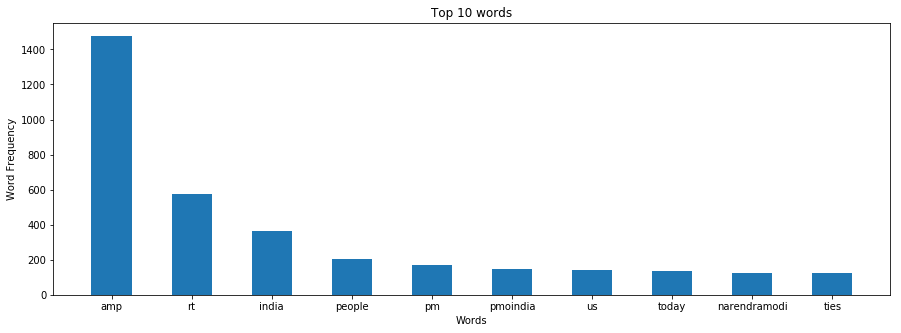

In [65]:
# top 10 words used by customers in review

Top_10_words = Word_table.sort_values(by = 'Freq', ascending = False).head(10)

Top_10_words

# Plotting the top 10 words

plt.rcParams['figure.figsize'] = [15, 5]
plt.bar(Top_10_words['Word'], Top_10_words['Freq'], width=0.5)
plt.xlabel("Words")
plt.ylabel("Word Frequency")
plt.title("Top 10 words")

plt.show()

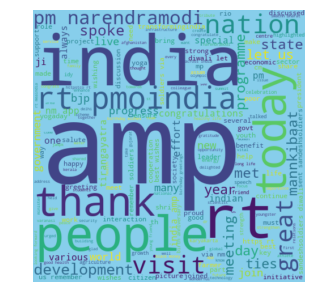

In [66]:
# Creating a word cloud

# Libraries
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Step 1: Create the wordcloud object

input_string = ' '.join(text['Split_words'])

wordcloud = WordCloud(width=480, height=480, margin=0, background_color="skyblue").generate(input_string)

# Step 2: Display the generated image

plt.rcParams['figure.figsize'] = [10, 5]
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()